### Intro. 파이썬과 Numpy 차이

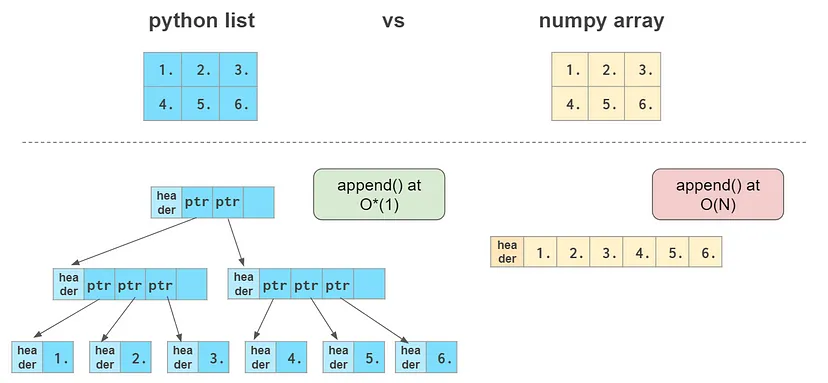

- 파이썬 리스트는 축(axis)도 포인터로 할당되어 있고, 각 축에 속한 원소도 포인터로 할당되어 있다.
- 반면, 넘파이는 하나의 배열에 담겨있다.
- 따라서, 파이썬 리스트의 원소 삽입/삭제는 (트리구조의 장점으로 인해) 넘파일 보다 빠르다.
- 하지만, 연산에서는 원소들이 인근 메모리에 있는 넘파이가 속도가 빠르다. 

In [2]:
import numpy as np
a = [1, 2, 3]
r = [q*2 for q in a]      # 리스트

na = np.array([1, 2, 3])
nr = na * 2 # 넘파이

print(r)
print(nr)

a = [1, 2, 3]
b = [4, 5, 6]
c = [q+r for q, r in zip(a, b)] # 리스트

na = np.array([1, 2, 3])
nb = np.array([4, 5, 6])
nc = na + nb # 넘파이

print(c)
print(nc)

[2, 4, 6]
[2 4 6]
[5, 7, 9]
[5 7 9]


#### 목차
- 단조 증가, 감소 배열 만들기: np.arange, np.linspace
- 랜점 숫자 배열 생성: np.random.randint ~ np.random.normal, rng.intergers ~ rng.normal
- 인덱싱 및 슬라이스: np.where, np.logical_and, np.logical_or, np.clip ...
- 수학 연산: np.einsum
- 행렬 연산: np.vstack, np.hstack, np.dstack
  

### 1. Vectors, the 1D Arrays

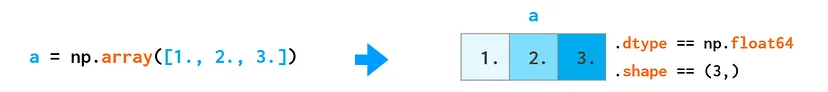
- 넘파일 배열을 생성하는 한가지 방법은 파이썬 리스트로 부터 생성하는 것이다
(트리 -> 배열 변환)
- 타입을 원소 타입으로 부터 자동으로 결정된다.

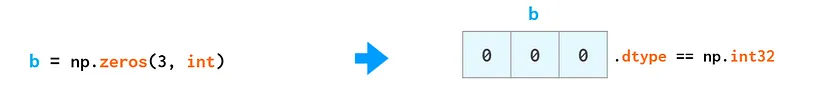
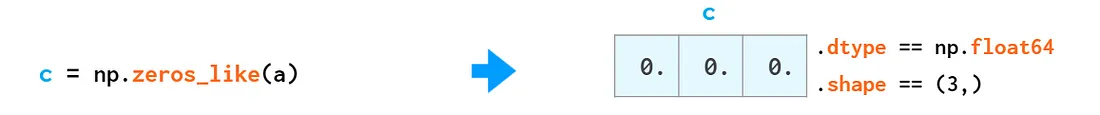
- 넘파일는 배열 자료구조를 가지기 때문에, 넘파일 변수 선언 전에 크기를 먼저 할당하는 것이 일반적이다.
- zeros 처럼 튜플을 입력으로 받거나, zeros_like 처럼 배열을 입력으로 받는다.

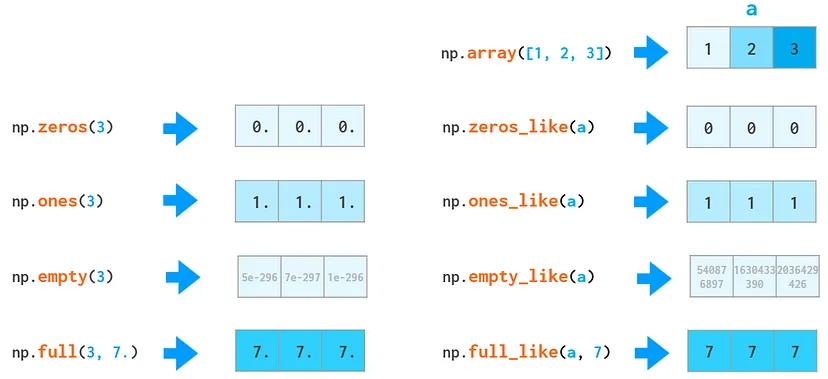

#### (1) 단조 증가 배열 만들기
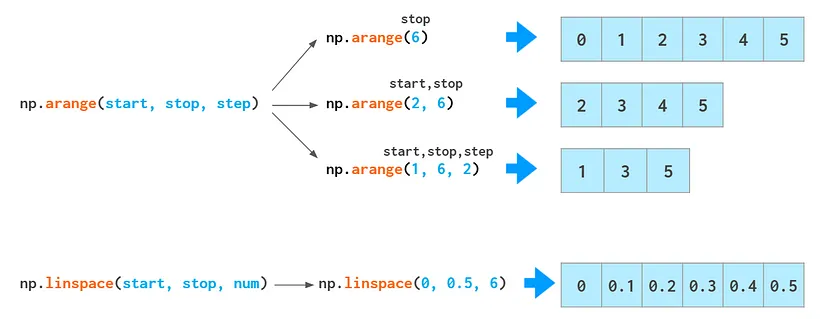
- np.arange는 간격을, np.linspace는 갯수를 입력으로 받는다.
- 실수 단조 증가 배열을 만들고 싶다면 아래와 같이 한다.
np.arange(6.)
- np.arange는 stop 값이 포함되지 않고, np.linspace는 stop 값이 포함됨을 주의

In [7]:
a = np.arange(6.)
b = np.arange(2., 6) # 실수가 하나라도 있다면, 실수에 맞춰진다.
c = np.arange(1, 6, 2.0) # 간격이 실수면, 실수 배열이 된다.
print(a)
print(b)
print(c)

[0. 1. 2. 3. 4. 5.]
[2. 3. 4. 5.]
[1. 3. 5.]


#### 단조 증가 배열 만들기(소수점 간격)

- 소수점 간격을 만들 때에는 np.arange()가 편하진 않다.
- np.arange()는 정수에서는 끝점(stop)을 포함하지 않지만, 소수점 간격에서는 포함되게 된다. 따라서, 소수점 간격일 때는 np.linspace를 이용하도록 한다.
(왜냐하면, 0.1은 인간에게는 finite decimal 숫자이지만, 컴퓨터에게는 소수점 자리수에 따라 값이 조금씩 다른 infinite number 이기 때문이다)
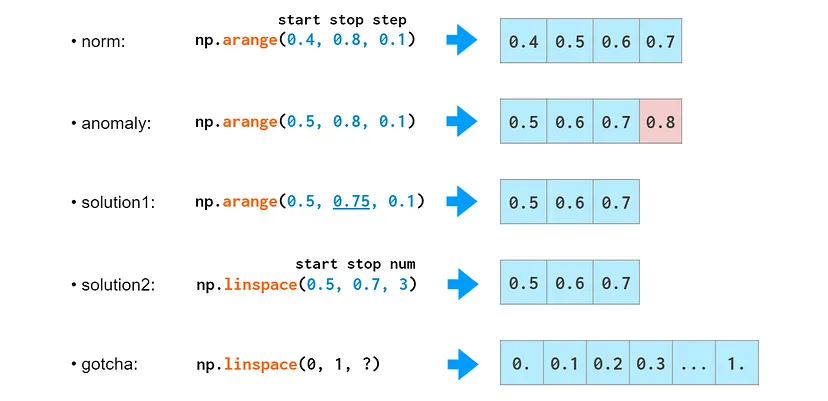

In [8]:
np.linspace(0.5, 0.8, 4)        

array([0.5, 0.6, 0.7, 0.8])

#### 랜던 숫자 배열 생성
- 아래는 Deprecated 된 랜덤 숫자 생성 방법
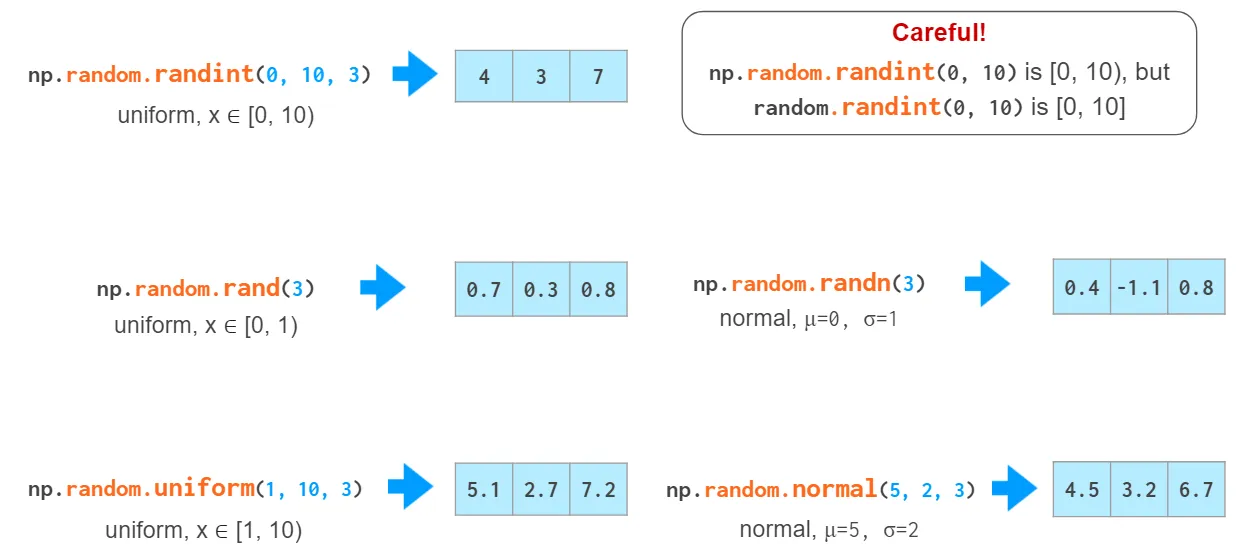
- np.random.randint(st, en) 는 [st, en) 이지만, random.randint는 [st, en] 이다

- 새로운 랜덤 숫자 생성 인터페이스는, 멀티 스레딩에 적합하며 빠르다.
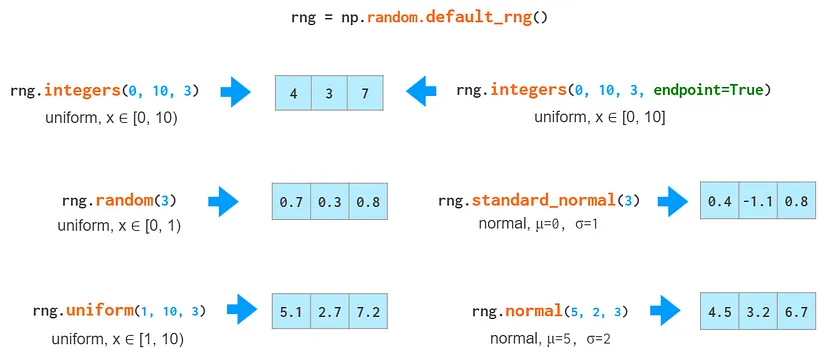

In [3]:
rng = np.random.default_rng()
print(rng)

a = rng.integers(0, 10, 3)
b = rng.integers(0, 10, 3, endpoint=True)
c = rng.random(3)          # 0 ~ 1 사이, 실수 3개 수집
d = rng.standard_normal(3) # 평균 0, 표준 편차 1 가지는 값 3개 수집
e = rng.uniform(1, 10, 3)  # 1 ~ 10 사이, 균일 분포 값 3개 수집
e1 = rng.uniform(3)        # 0~3 사이 균일 분포에서 1개 값
f = rng.normal(5, 2, 3)    # 평균 5, 표준편차 2, 실수 3개 수집

print(a)
print(b)
print(c)
print(d)
print(e)
print(e1)
print(f)

Generator(PCG64)
[4 8 3]
[ 8  6 10]
[0.46270488 0.27165365 0.14179892]
[-1.32722442 -1.51868698  0.83163704]
[2.34190523 2.54919468 6.019784  ]
1.062009441635591
[2.31563422 1.63800555 2.76617108]


#### Vector Indexing

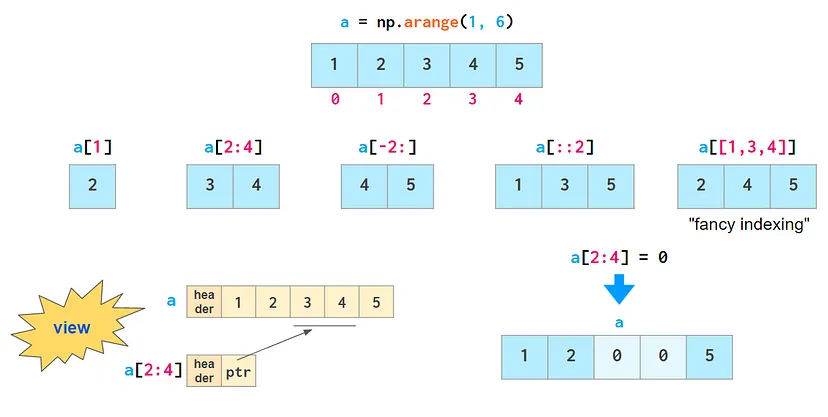
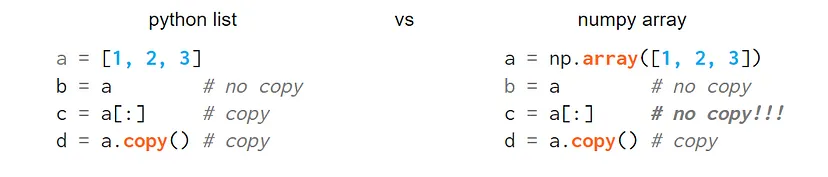

- ★ 넘파이는 파이썬 리스트와는 다르게 인덱싱을 해도 copy가 일어나지 않는다
- View 기능을 이용해서, 포인터로 참조한다.
- 정리하면, 값 복사를 하고 싶다면 .copy() 함수를 사용한다.


In [23]:
a = [1, 2, 3]
b = a[:]   # copy  
# b = a.copy()
a[0] = 100
c = a      # no copy
c[0] = 101
print(b)
print(c)

[1, 2, 3]
[101, 2, 3]


In [4]:
a = np.array([1, 2, 3]) # tree to array
b = a # no copy
b[0] = 100
print(b)
c = a[:] # no copy!
a[1] = 100
print(c)

[100   2   3]
[100 100   3]


In [5]:
# 파이썬 트릭, Numpy는 아래 방식이 안된다.
a = [1, 2, 3]
a[1:2] = [5, 6] # 1 index 값을 바꾸고 싶다면 왼쪽과 같이 한다. 파이썬 리스트 값 치환 트릭.
print(a)
a[2] = [7, 8] # Insert 됨에 주의 한다.
print(a)

[1, 5, 6, 3]
[1, 5, [7, 8], 3]


In [5]:
arr = np.array([[1, 1], [2, 2], [3, 3]])
print(arr)

np.insert(arr, 1, 5)  # ?? arr가 변하지 않는다. 
print(arr)

a = np.insert(arr, 1, 5, axis=1)
print(a)

b = np.insert(arr, 1, 5, axis=0) 
print(b)

c = np.insert(arr, 1, 5) # 값이 변하지만, flatten 된다(?)
print(c)

[[1 1]
 [2 2]
 [3 3]]
[[1 1]
 [2 2]
 [3 3]]
[[1 5 1]
 [2 5 2]
 [3 5 3]]
[[1 1]
 [5 5]
 [2 2]
 [3 3]]
[1 5 1 2 2 3 3]


#### Numpy Slice

[start:end] 로 슬라이스 할 수 있으며
[start:end:step]으로 슬라이스 할 수도 있다.

start 값이 없으면 '0'으로 간주한다. 
end에 값이 없으면 배열 끝까지로 생각한다.
step에 값이 없으면 '1'로 간주한다.

In [4]:
import numpy as np
arr = np.array([1, 2, 3, 4, 5, 6, 7])
              # 0 (1) 2 (3)  4  5
print(arr[1:5:2])

arr = np.array([1, 2, 3, 4, 5, 6, 7])
print(arr[::2])

arr = np.array([[1, 2, 3, 4, 5],
                [6, 7, 8, 9, 10]])
print(arr[0:2, 2])

[2 4]
[1 3 5 7]
[3 8]


#### 논리로 값/인덱스 추출

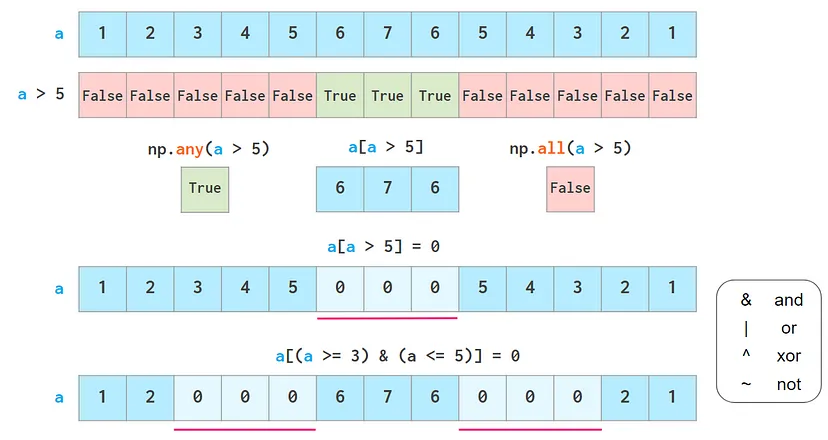

##### (1) 인덱스 추출 (np.where, np.nonzero)

In [57]:
# np.where은 인덱스 값을 논리로 뽑아낸다.

a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
b = np.where(a>5) # 반환된 b는 tuple이며, a의 인덱스 값이다 (리스트가 아닌 넘파일 배열에서만 수행된다)
print(b)
#b[0] = 100       # 따라서, 수정이 안된다.
# print(a)

d = np.where(a>5)[0] # 값만 뽑아내고 싶다면 [0]를 뒤에 붙인다.
print(d)

c = np.nonzero(a > 5) # np.where과 np.nonzero는 동일한 결과값
print(c)

print(a>5) # ★ 개인적으로 인덱스 값이 특별히 필요하지 않는한 왼쪽 방법을 선호한다.

(array([5, 6, 7], dtype=int64),)
[5 6 7]
(array([5, 6, 7], dtype=int64),)
[False False False False False  True  True  True False False False False
 False]


##### (2) 값 추출

In [66]:
# 값을 뽑고 싶다면 아래와 같이 한다.
a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
print(a[np.where(a>5)])
print(a[np.where((a>=3) & (a<=5))])
#print(np.any(a>5))

print(a[a>5]) # 선호 하는 방법
print(a[(a>=3) & (a<=5)]) # 선호하는 방법
print(a[np.logical_and(
        a>=3,            # 선호하는 방법
        a<=5             # 가시적으로 논리를 이어 붙일 수 있다
        )])

[6 7 6]
[3 4 5 5 4 3]
[6 7 6]
[3 4 5 5 4 3]
[3 4 5 5 4 3]


##### (3) 값 수정

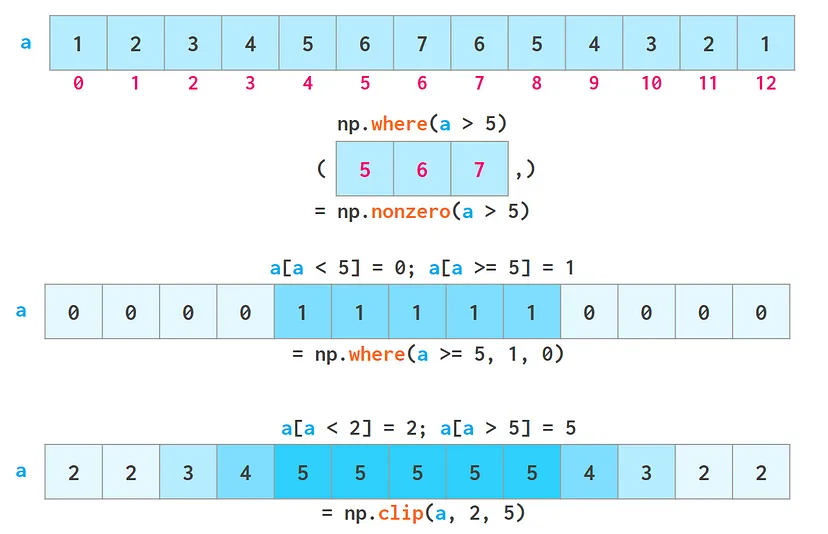

In [62]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
b = np.where(a>5, 100, a) # np.where은 인덱스를 뽑기도 하고, 수정도 가능하다
print(b)

a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
b = np.where((a>=3) & (a<=5), 100, a)
print(b)

a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
a[a>5] = 100  # 선호하는 방법
print(a)

a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
a[(a>=3) & (a<=5)] = 100 # 선호하는 방법
print(a)

[  1   2   3   4   5 100 100 100   5   4   3   2   1]
[  1   2 100 100 100   6   7   6 100 100 100   2   1]
[  1   2   3   4   5 100 100 100   5   4   3   2   1]
[  1   2 100 100 100   6   7   6 100 100 100   2   1]


In [67]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
b = np.clip(a, 3, 5) # 3과 5를 하한, 상한으로 둔다
print(b)

[3 3 3 4 5 5 5 5 5 4 3 3 3]


#### Vector Operations

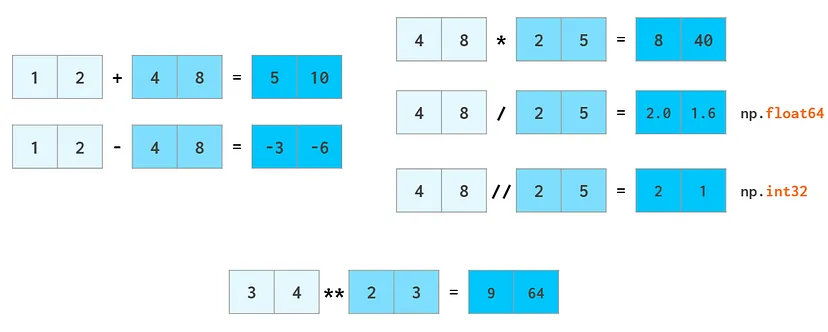
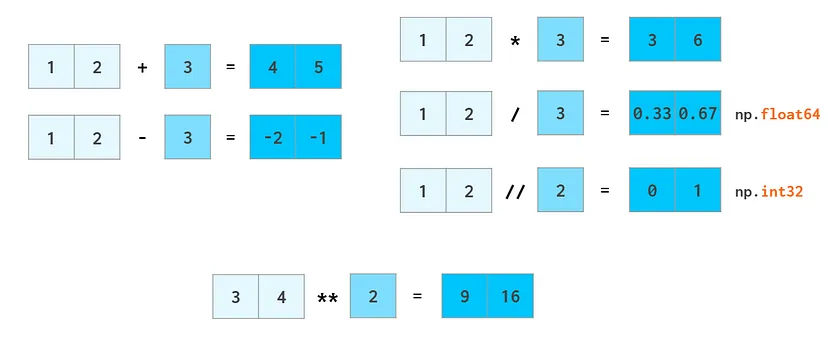
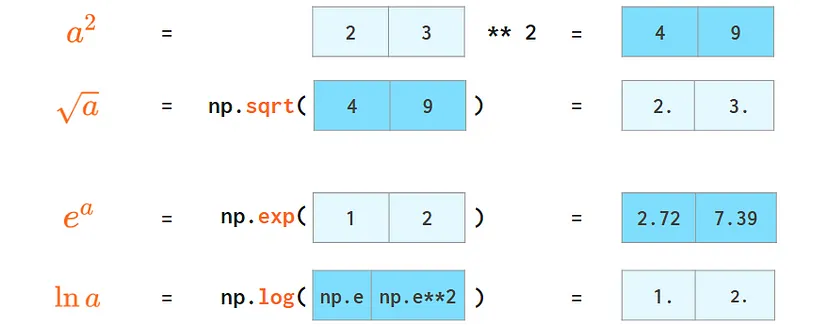
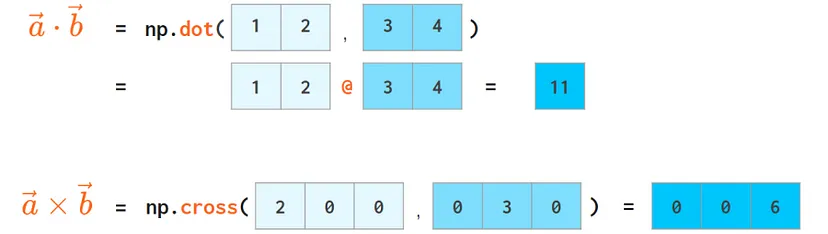
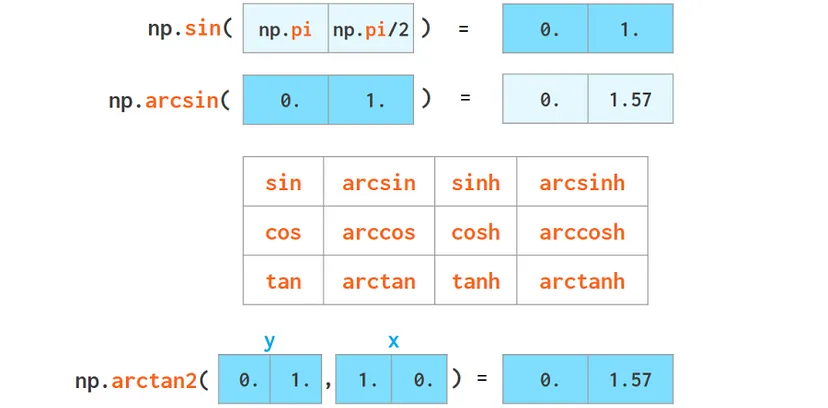
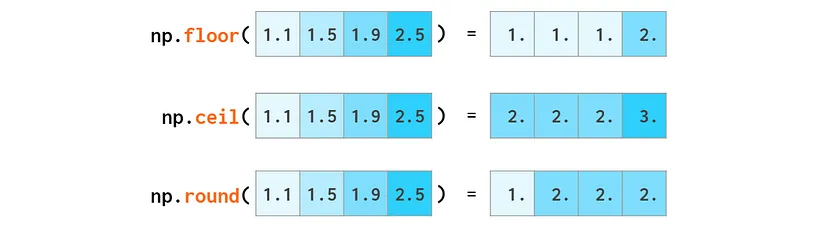

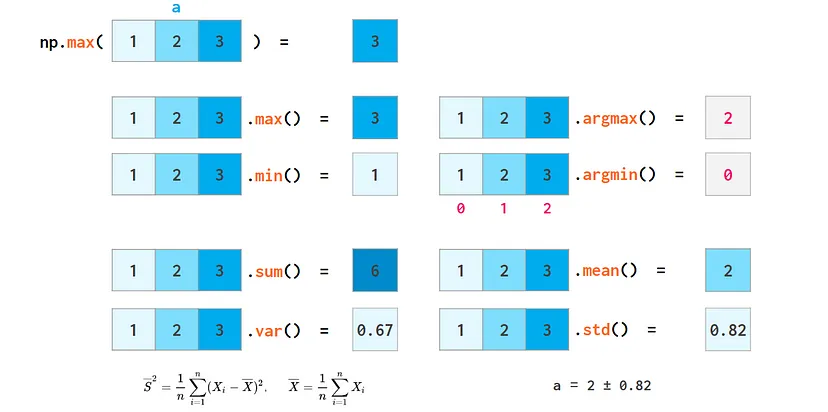

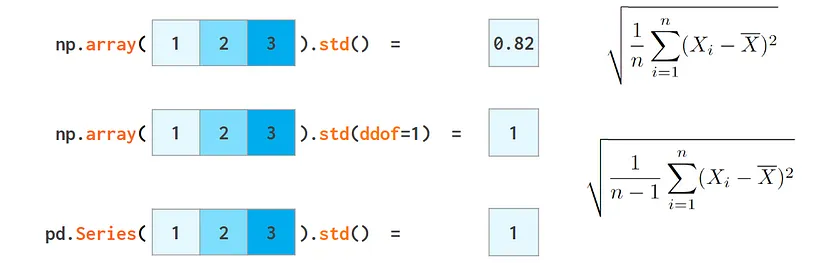

n-1로 나누기 위해서는 ddof=1 옵션을 붙여야 한다

In [69]:
res1, res2, res3 = [],  [], []
for i in range(10000):
    a = np.random.randn(100)
    res1.append(a.std())
    res2.append(a.std(ddof=1))
    res3.append(a.std(ddof=1.5))

print(np.mean(res1))
print(np.mean(res2))
print(np.mean(res3))

0.9925652556622239
0.9975656160529628
1.0000943035472358


#### 정렬 기능
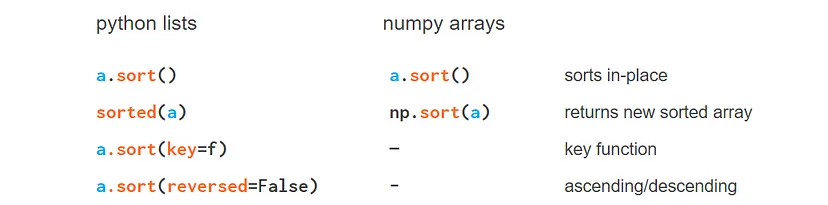
- 정렬 기능은 파이썬에 비해 부족하다.
따라서, 정렬을 수행하기 위해서는 python 빌트인 함수를 사용하도록 한다

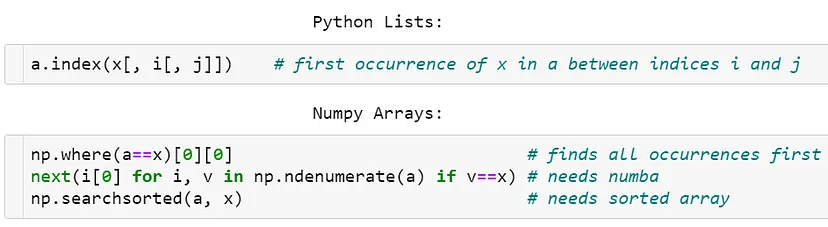

#### Searching for an element in a vector
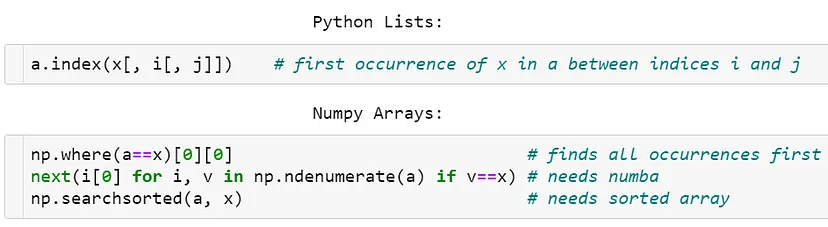

- 파이썬과 다르게 넘파이는 index 메소드를 가지고 있지 않다.


In [1]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1])
b = np.where(a==x)[0][0] # Bad
next(i[0] for i, v in np.ndenumerate(a) if v == x) 
# numba를 포함하지 않으면 where 보다 느리다
np.searchsorted(a, x)
# 배열이 정렬이 되었다면, 속도는 매우 빨라진다.

NameError: name 'np' is not defined

In [25]:
import math

print((0.1 + 0.2) == 0.3)
print(1e-9 == 2e-9)
print((0.1+0.2-0.3) == 0)

print()

print(np.allclose(0.1 + 0.2, 0.3))
print(np.allclose(1e-9, 2e-9))      # True!!, 넘파이가 조금 더 관대하다??
print(np.allclose(0.1+0.2-0.3, 0))

print()

print(math.isclose(0.1 + 0.2, 0.3))
print(math.isclose(1e-9, 2e-9))     # False
print(math.isclose(0.1+0.2-0.3, 0)) # False!!!


False
False
False

True
True
True

True
False
False


numpy.all(a, axis=None, out=None, keepdims=<no value>, *, where=<no value>)
- 배열의 모든 데이터가 조건과 맞으면 True 하나라도 다르면 False

In [9]:
a = np.all([[True, False], [True, True]])
print(a)

a = np.all([[True, False], 
            [True, True]], axis=0, keepdims=True)
print(a)

a = np.all([[True, False], 
            [True, True]], axis=1, keepdims=True)
print(a)

print()
print()

b = np.any([[True, False], [True, True]])
print(b)

b = np.any([[True, False], 
            [True, True]], axis=0, keepdims=True)
print(b)

b = np.any([[True, False], 
            [True, True]], axis=1, keepdims=True)
print(b)

False
[[ True False]]
[[False]
 [ True]]


True
[[ True  True]]
[[ True]
 [ True]]


np.allclose assumes all the compared numbers to be of a typical scale of 1. For example, if you work with nanoseconds, you need to divide the default atol argument value by 1e9: np.allclose(1e-9, 2e-9, atol=1e-17) == False.

math.isclose makes no assumptions about the numbers to be compared but relies on a user to give a reasonable abs_tol value instead (taking the default np.allclose atol value of 1e-8 is good enough for numbers with a typical scale of 1): math.isclose(0.1+0.2–0.3, abs_tol=1e-8)==True.

### 2. Matrices, the 2D Arrays

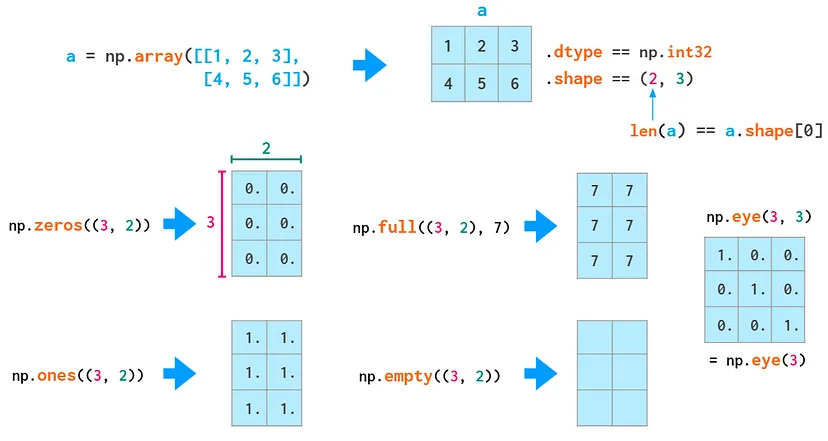
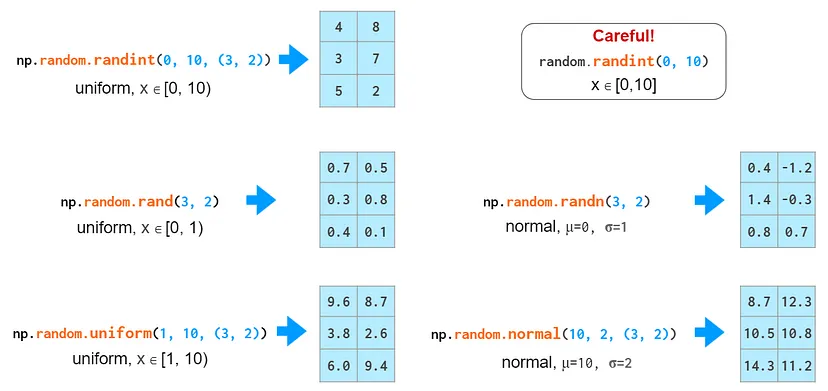

In [87]:
a = np.random.randint(0, 10, (3, 2)) # 0 ~ 10 사이, (3, 2) 모양 배열
b = np.random.rand(3, 2) # 0~1 사이 균일 분포, (3, 2) 모양
c = np.random.uniform(1, 10, (3, 2)) # 1~10 사이 균일 분포, (3, 2) 모양
d = np.random.randn(3, 2) # 평균 0, 표준 편차 1 정규 분포
e = np.random.normal(10, 2, (3, 2)) # 평균 10, 표준 편차 2 인 (3, 2) 행렬
print(a)
print(b)
print(c)
print(d)
print(e)

[[0 0]
 [8 5]
 [1 0]]
[[0.86239687 0.73408916]
 [0.1437317  0.40851615]
 [0.12511455 0.32678481]]
[[8.72524929 3.20218993]
 [5.0556498  2.80418016]
 [5.24665515 3.65221135]]
[[-1.11656245 -0.8428586 ]
 [-2.10099463  0.44514728]
 [-0.02341254 -0.60891012]]
[[ 5.92477875 10.33794369]
 [ 9.19056367 14.54278325]
 [ 8.37256055  9.35993943]]


In [26]:
rng = np.random.default_rng()
print(rng)

a = rng.integers(0, 10, 3)
b = rng.integers(0, 10, 3, endpoint=True)
c = rng.random(3)          # 0 ~ 1 사이, 실수 3개 수집
d = rng.standard_normal(3) # 평균 0, 표준 편차 1
e = rng.uniform(1, 10, 3)  # 1 ~ 10 사이, 균일 분포
e1 = rng.uniform(3)        # 0 ~ 3 사이, 균일 분포 값 1개
f = rng.normal(5, 2, 3)    # 평균 5, 표준편차 2, 실수 3개 수집

print(a)
print(b)
print(c)
print(d)
print(e)
print(e1)
print(f)

Generator(PCG64)
[5 6 5]
[5 0 2]
[0.50665032 0.25010626 0.34190257]
[-0.88975683  0.27446492 -0.28778108]
[3.52999017 6.83869764 5.8215499 ]
1.0616045928976252
[8.13037741 5.25706944 8.46377413]


#### The axis argument

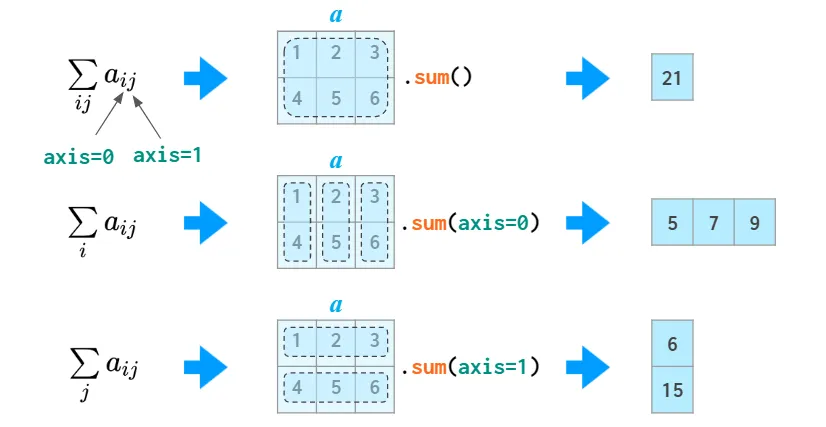

- axis=0은 column-wise, axis=1은 row-wise 이다
- 일반적으로 말하면, axis=0는 rows를 인댁싱할 책임이 있고,
  sum(axis=0) 의미는 '모든 row에 대해서 column sum 이다'
  (쉽게 말해 rows의 차원 삭제, column 차원 유지 즉, **row를 (1,)로 만든다**)
- axis=1은 column 차원 삭제, row 차원 유지 즉, **column을 (1,)로 만든다**

#### Einstein summation
- np.einsum('ij->j', a) 는 row 축을 차원 제거로 sum(axis=0)과 같다.
- np.einsum('ij->i', a) 는 column 축을 차원 제거로 sum(axis=1)과 같다.

#### Matrix arithmetic
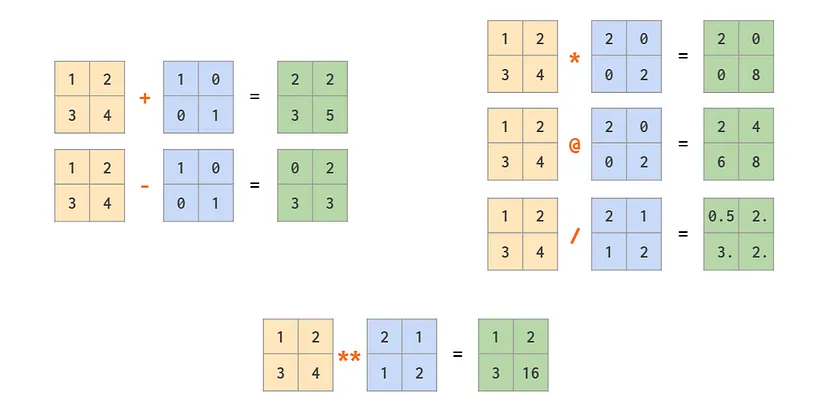
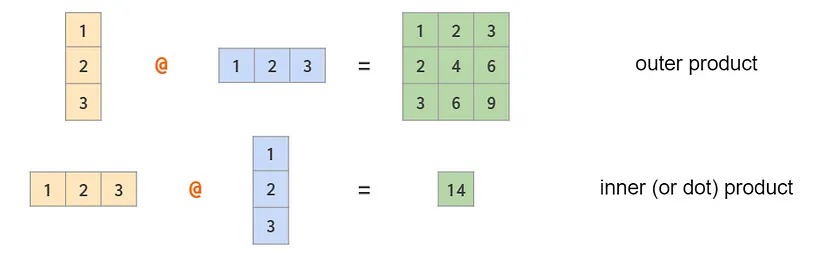

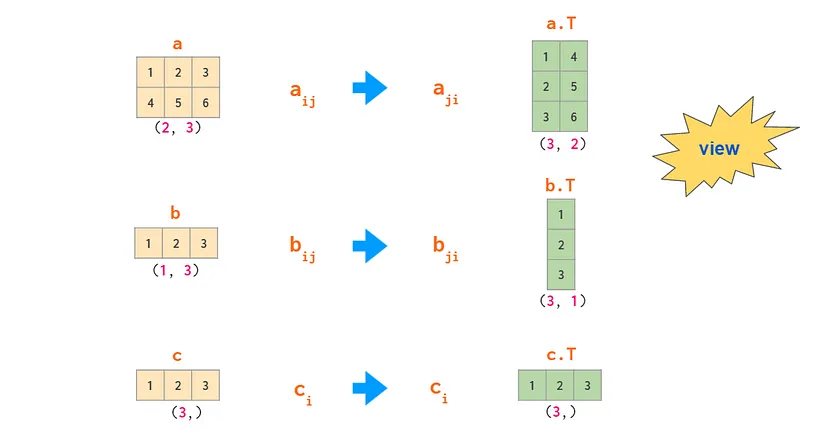  
-벡터는 Transpose를 해도 벡터이다

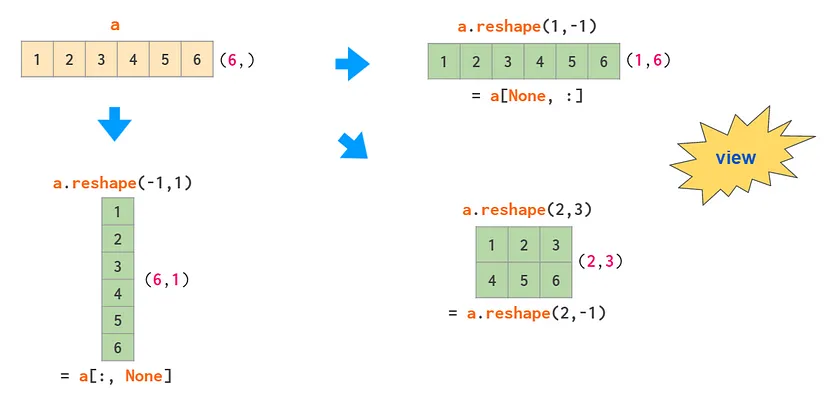

In [97]:
a = np.array([1, 2, 3, 4, 5, 6]) # int32
b = a.reshape(-1, 1)
c = a[:, None] # None이 np.newaxis 역할을 대신한다.
d = a[:, np.newaxis]
e = np.expand_dims(a, axis=1)
print(a)
print(b)
print(c)
print(d)
print(e)



[1 2 3 4 5 6]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [98]:
a = np.array([1, 2, 3, 4, 5, 6]) # int32
b = a.reshape(1, -1)
c = a[None,:] # None이 np.newaxis 역할을 대신한다.
d = a[np.newaxis,:]
e = np.expand_dims(a, axis=0)
print(a)
print(b)
print(c)
print(d)
print(e)

[1 2 3 4 5 6]
[[1 2 3 4 5 6]]
[[1 2 3 4 5 6]]
[[1 2 3 4 5 6]]
[[1 2 3 4 5 6]]


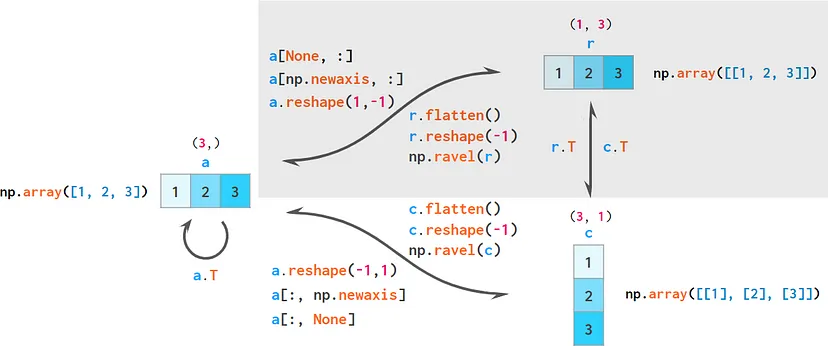

엄밀히 말해서, 어떠한 배열이라도 하나의 차원이 '1'이면 벡터이다(??)
eg. a.shape==[1,1,1,5,1,1]
따라서, 무한한 타입의 벡터가 있지만, 위의 그림에 나타난 3개의 벡터가 일반적으로 쓰인다.

#### Matrix manipulations (헹렬 붙이기/분리하기)

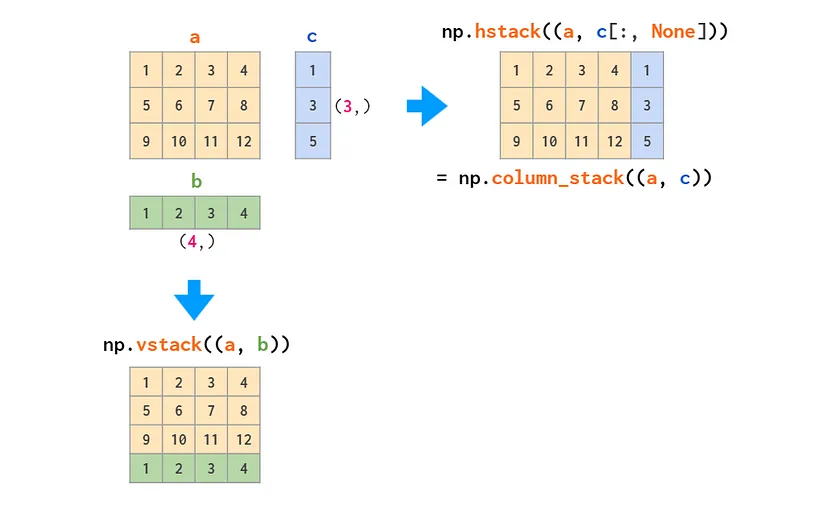
- ★ column_stack을 이용하면, 2D 행렬에 벡터를 붙일 때 차원 변환을 따로 안해줘도 되서 편리하다!

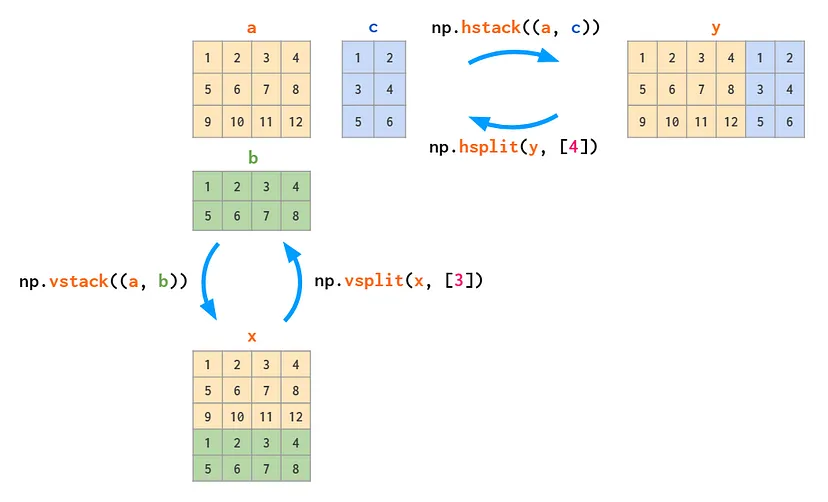
- 분리는 split할 기준 인덱스를 [split_index]로 넣어준다
- np.hsplit(integrated_matrix, [split_index])
- np.vsplit(integrated_matrix, [split_index])

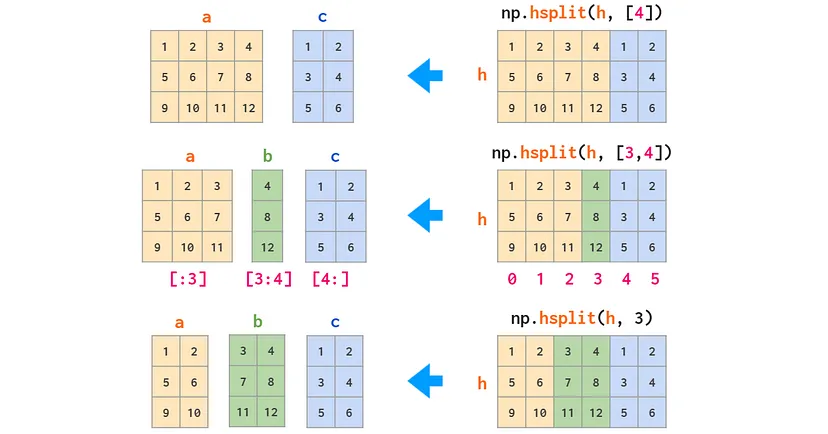
- 여러 등분으로 분리하고자 한다면, 등분할 인덱스를 배열로 나타낸다.
- 등분 갯수로 표현하고 싶다면, 위의 그림처럼 스칼라 값을 넣는다.

#### 행렬 복사/복제

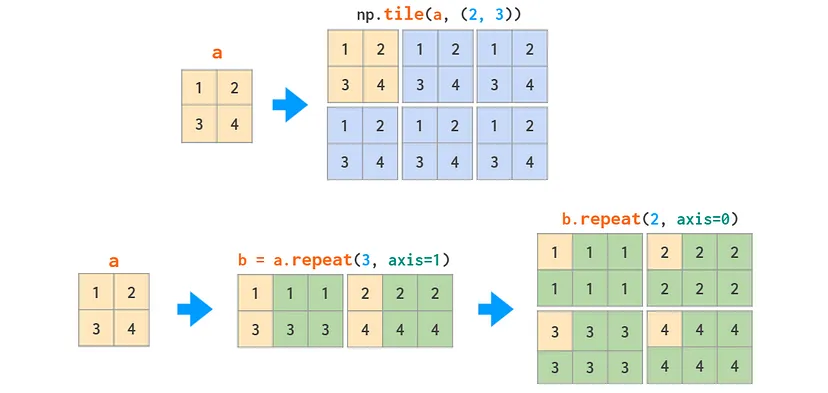
- np.tile은 타일 붙이 듯이 행렬을 복제한다.
- np.tile(mat, (2, 3)): 2는 행으로, 3은 열로 복제 횟수를 나타낸다

- b = a.repeat(num, axis=1) 은 a 행렬을 axis=1 즉 열 단위 복사를 의미한다.
- c = b.repeat(num, axis=0) 은 b 행렬을 axis=0 즉 행 단위 복사를 의미한다.
(repeat는 행렬 사이에 값이 복사되어 들어가는 특이한 연산이다)

#### 행렬 특정 행/열 삭제하기

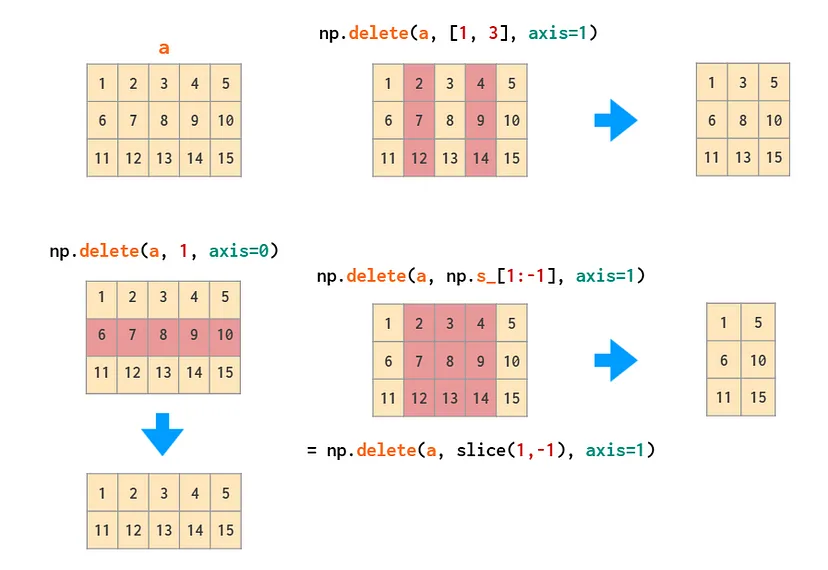

In [103]:
a = np.arange(1, 16).reshape(3, 5)
print(a)
b = np.delete(a, [1, 3], axis=1)
print(b)
c = np.delete(a, 1, axis=0)
print(c)

d = np.delete(a, np.s_[1:-1], axis=1)
print(d)

e = np.delete(a, slice(1, -1), axis=1)
print(e)

[[ 1  2  3  4  5]
 [ 6  7  8  9 10]
 [11 12 13 14 15]]
[[ 1  3  5]
 [ 6  8 10]
 [11 13 15]]
[[ 1  2  3  4  5]
 [11 12 13 14 15]]
[[ 1  5]
 [ 6 10]
 [11 15]]
[[ 1  5]
 [ 6 10]
 [11 15]]


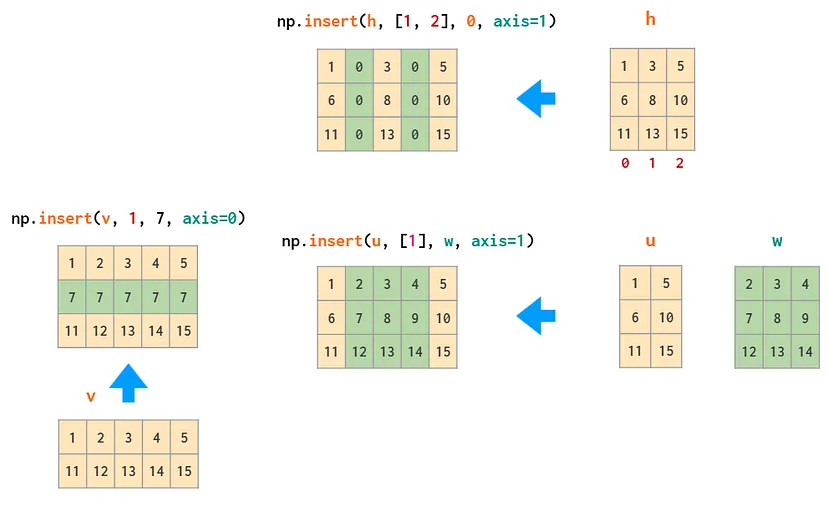

In [111]:
a = np.arange(1, 10).reshape(3, 3)
print(a)

b = np.insert(a, [1, 2], 0, axis=1)
print(b)

c = np.insert(a, 1, 8, axis=0) 
print(c)

d = np.zeros((3, 2))
print(d)

e = np.insert(d, [1], a, axis=1)
print(e)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 0 2 0 3]
 [4 0 5 0 6]
 [7 0 8 0 9]]
[[1 2 3]
 [8 8 8]
 [4 5 6]
 [7 8 9]]
[[0. 0.]
 [0. 0.]
 [0. 0.]]
[[0. 1. 2. 3. 0.]
 [0. 4. 5. 6. 0.]
 [0. 7. 8. 9. 0.]]


#### (번외) append 연산을 행렬에??

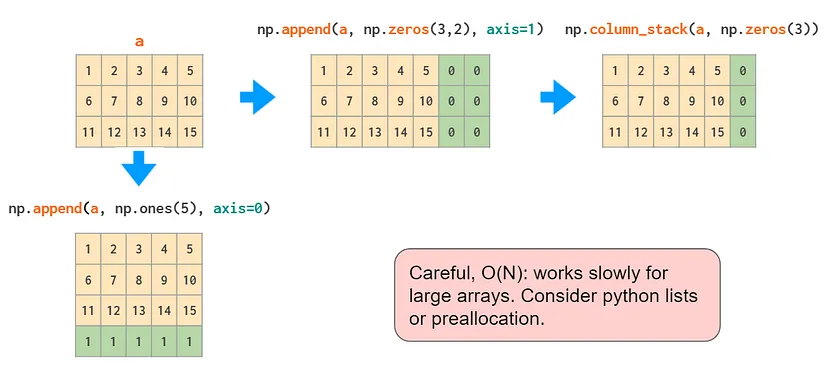

- hstack 은 벡터를 행렬에 더할 경우 자동 축 증강이 안되서, column_stack을 사용하라고 앞에서 언급 했었다.
- append 연산도 hstack 처럼 자동 축 증강이 안되서 축을 명시하거나, 더 할 벡터를 미리 행렬로 만들어 줘야 한다.
- 하지만, 이 마저도 append 연산은 O(N) 이므로 행렬 연산에서 append를 사용할 일은 없다고 봐도 좋다.

(★ numpy는 행렬 크기를 미리 할당하고 사용해야 장점을 발휘할 수 있으므로, append 연산은 되도록이면 사용하지 않는 것이 좋을 것 같다.)

#### pad 연산(complicated)

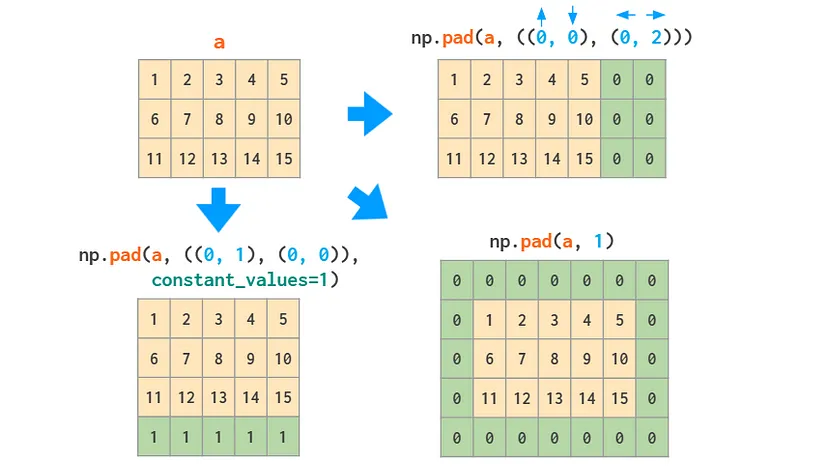

In [39]:
a = [1, 2, 3, 4, 5]
a = np.pad(a, (2, 3)) # a 행렬 모든 축에 앞에 2개, 뒤에 3개 '0'을 패딩한다
print(a)

print()

a = [[1, 2, 3, 4, 5]]
a = np.pad(a, (2, 3)) # a 행렬 모든 축에 앞에 2개, 뒤에 3개 '0'을 패딩한다
print(a)

print()

a = [[1, 2, 3, 4, 5]]
a = np.pad(a, (2, 3), constant_values=9) # a 행렬 모든 축에 앞에 2개, 뒤에 3개 '0'을 패딩한다
print(a)

print()

a = [[1, 2, 3, 4, 5]]
a = np.pad(a, ((2, 3), (0, 0))) 
print(a)

print()

a = [[1, 2, 3, 4, 5]]
a = np.pad(a, ((0, 0), (2, 3))) 
print(a)

[0 0 1 2 3 4 5 0 0 0]

[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 1 2 3 4 5 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]

[[9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 1 2 3 4 5 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]
 [9 9 9 9 9 9 9 9 9 9]]

[[0 0 0 0 0]
 [0 0 0 0 0]
 [1 2 3 4 5]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]

[[0 0 1 2 3 4 5 0 0 0]]


#### Meshgrids

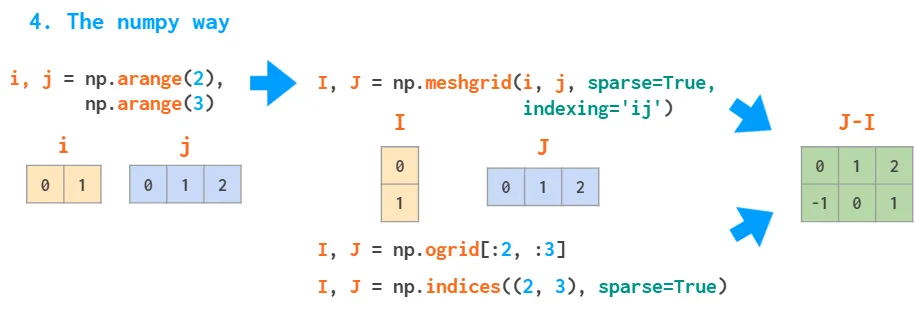

- 길이 M 및 N의 입력이 있는 2-D 경우 출력은   
  'xy' 인덱싱의 경우 모양이 (N, M)이고   
  'ij' 인덱싱의 경우 모양이 (M, N)이다.
- 길이가 M, N, P인 입력이 있는 3D 에서 출력은   
  'xy' 인덱싱의 경우 모양이 (N, M, P)이고   
  'ij' 인덱싱의 경우 모양이 (M, N, P)이다.

In [52]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)

'''
xv, yv = np.meshgrid(x, y, indexing='ij')
for i in range(nx):
    for j in range(ny):
        # treat xv[i,j], yv[i,j]

xv, yv = np.meshgrid(x, y, indexing='xy')
for i in range(nx):
    for j in range(ny):
        # treat xv[j,i], yv[j,i]
'''

"\nxv, yv = np.meshgrid(x, y, indexing='ij')\nfor i in range(nx):\n    for j in range(ny):\n        # treat xv[i,j], yv[i,j]\n\nxv, yv = np.meshgrid(x, y, indexing='xy')\nfor i in range(nx):\n    for j in range(ny):\n        # treat xv[j,i], yv[j,i]\n"

[[0.  0.5 1. ]
 [0.  0.5 1. ]]
[[0. 0. 0.]
 [1. 1. 1.]]


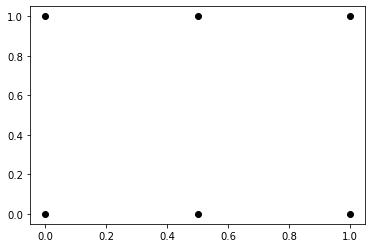

[[0.  0.5 1. ]]
[[0.]
 [1.]]


In [43]:
nx, ny = (3, 2)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
print(xv)
print(yv)

import matplotlib.pyplot as plt
plt.plot(xv, yv, marker='o', color='k', linestyle='none')
plt.show()

xv, yv = np.meshgrid(x, y, sparse=True)
print(xv)
print(yv)

In [50]:
i, j = np.arange(2), np.arange(3)
I, J = np.meshgrid(i, j, sparse=True, indexing='ij')
print(I)
print(J)
print(J-I)

print()
a = np.fromfunction(lambda i, j: j-i, (2, 3))
print(a)

print()

i, j = np.ogrid[:2, :3] # ogrid는 다 차원 meshgrid를 반환한다  np.meshgrid(i, j, sparse=True)와 겹친다.
print(i)                # https://numpy.org/doc/stable/reference/generated/numpy.ogrid.html#numpy.ogrid
print(j)
print(np.ogrid[0:5,0:5])


[[0]
 [1]]
[[0 1 2]]
[[ 0  1  2]
 [-1  0  1]]

[[ 0.  1.  2.]
 [-1.  0.  1.]]

[[0]
 [1]]
[[0 1 2]]
[array([[0],
       [1],
       [2],
       [3],
       [4]]), array([[0, 1, 2, 3, 4]])]


#### Matrix statistics

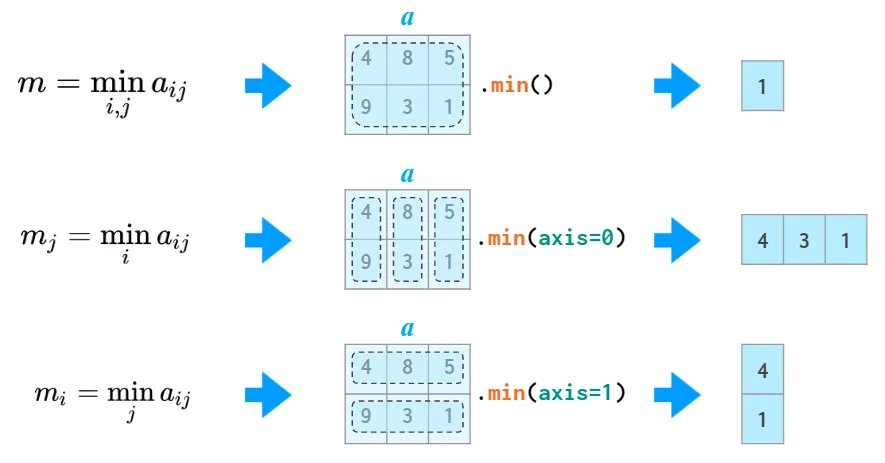
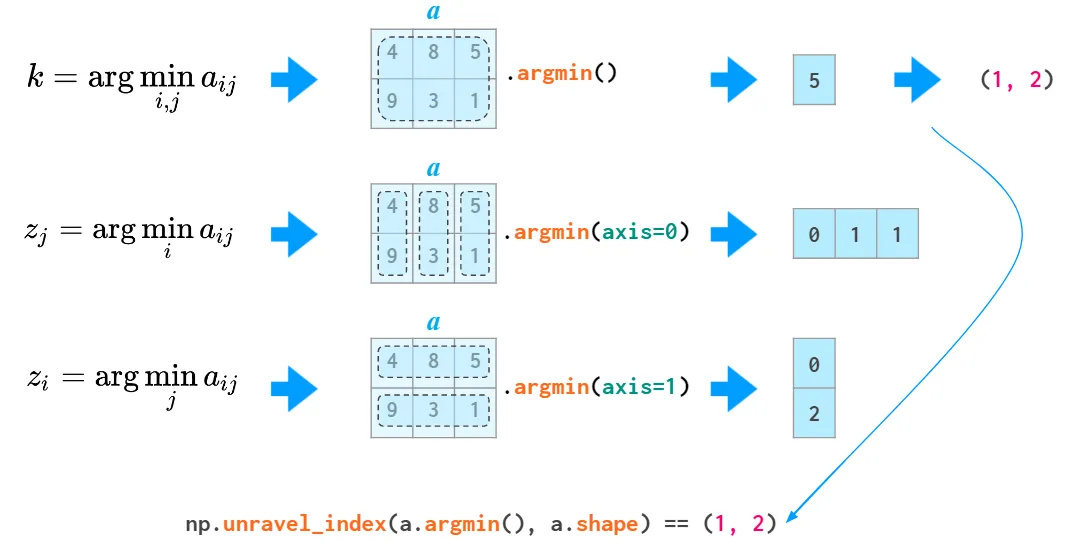

In [65]:
a = np.array([[4, 8, 5], 
              [9, 3, 1]])
print(np.argmin(a))
print(np.argmin(a, axis=0))
print(np.argmin(a, axis=1))
print()
print(a.argmin())       # 5
print(a.argmin(axis=0)) # [0 1 1]
print(a.argmin(axis=1)) # [0 2]
print()

a = np.array([[4, 8, 5], 
              [9, 3, 1]])
print(np.unravel_index(a.argmin(), a.shape)) # 5라는 값이 어디서 왔는지 알고 싶다면, np.unravel_index(a.argmin(), a.shape))
# (1, 2)
print(np.unravel_index(a.argmin(axis=0), a.shape))  # ?? 
# [(0,0), (0,1), (0,1)]
print(np.unravel_index(a.argmin(axis=1), a.shape))
# [(0,0), (0,2)]


5
[0 1 1]
[0 2]

5
[0 1 1]
[0 2]

(1, 2)
(array([0, 0, 0], dtype=int64), array([0, 1, 1], dtype=int64))
(array([0, 0], dtype=int64), array([0, 2], dtype=int64))


In [7]:
# <추가> https://stackoverflow.com/questions/48135736/what-is-an-intuitive-explanation-of-np-unravel-index

a = np.unravel_index([22, 41, 37], (7,6)) 
print(a)
# unravel_index 는 [22, 41, 37]의 Flatten 되기 전 인덱스가 무엇인지 알려준다.

# 뒤의 튜플(7, 6)은 Flatten 되기 전 타겟 배열을 뜻한다. 
# [22, 41, 37]은 Flatten 되었을 때 인덱스를 뜻한다.

'''
      [[ 0,   1,   2,   3,   4,   5],
       [ 6,   7,   8,   9,  10,  11],
       [12,  13,  14,  15,  16,  17],
       [18,  19,  20,  21, *22*, 23],  <- (3, 4)
       [24,  25,  26,  27,  28,  29],
       [30,  31,  32,  33,  34,  35],
       [36, *37*, 38,  39,  40, *41*]]
           (6, 1)               (6,5)

[(3, 4), (6, 5), (6, 1)]     
출력은 ([3, 6, 6]), ([4, 5, 1]) 로 한다 (왜?...)    
'''

a = np.unravel_index(6, (3, 4))  # (3, 4) 행렬일때 6의 위치
print(np.arange(12).reshape(3, 4))
(1, 2)


(array([3, 6, 6], dtype=int64), array([4, 5, 1], dtype=int64))
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


(1, 2)

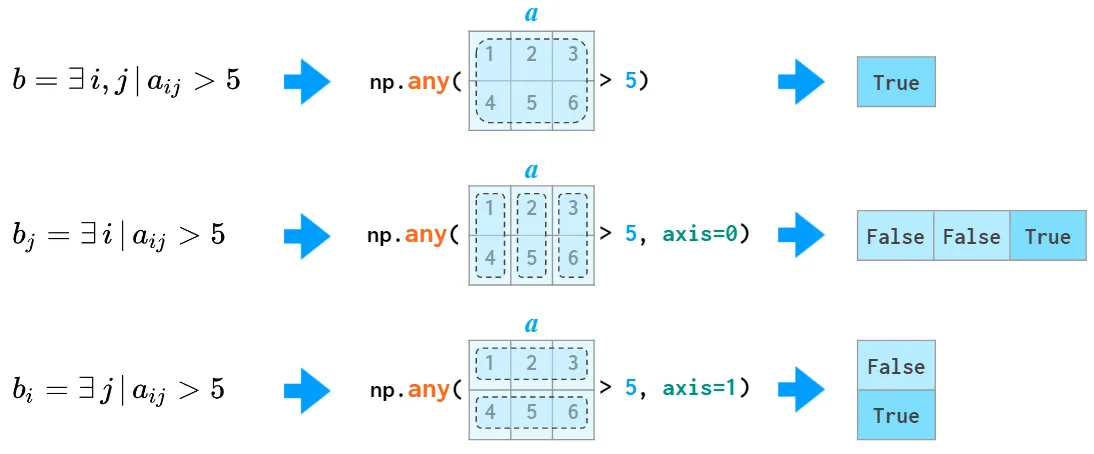

#### Matrix sorting

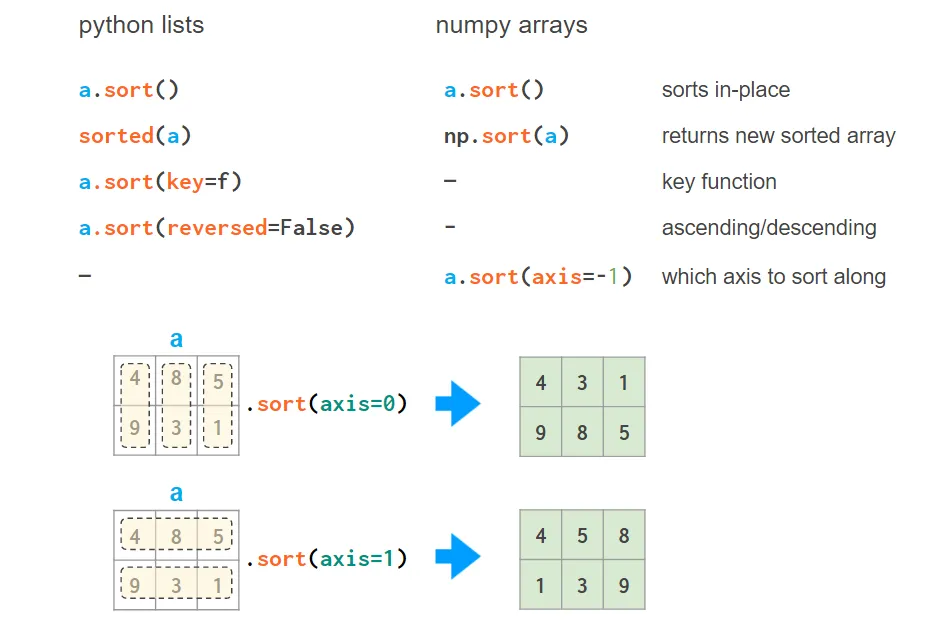

In [72]:
a = np.array([[9, 3, 1], 
              [4, 8, 5]])
print(np.sort(a))

a = np.array([[9, 3, 1], 
              [4, 8, 5]])
print(np.sort(a, axis=0)) # 열

a = np.array([[9, 3, 1], 
              [4, 8, 5]])
print(np.sort(a, axis=1)) # ↓

[[1 3 9]
 [4 5 8]]
[[4 3 1]
 [9 8 5]]
[[1 3 9]
 [4 5 8]]


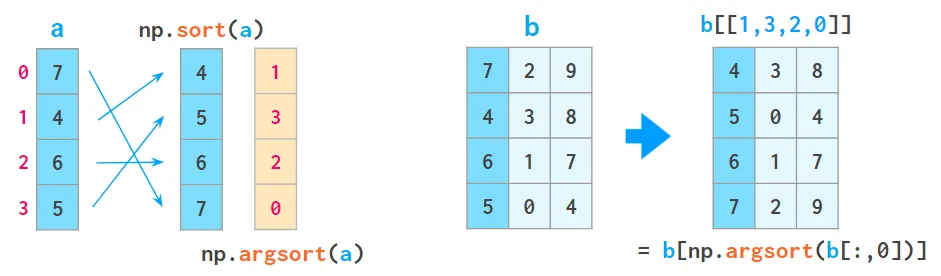

In [76]:
a = np.array([7,4,6,5])
print(np.sort(a))
print(np.argsort(a)) # 4는 1번 인덱스에서, 5는 3번 인덱스에서, 6은 2번 인덱스에서, 7은 0번 인덱스에서 옴

[4 5 6 7]
[1 3 2 0]


In [80]:
b = np.array([[7, 2, 9], [4, 3, 8], [6, 1, 7], [5, 0, 4]])
print(b)
print(np.argsort(b[:,0]))
print(b[np.argsort(b[:,0])]) # ★ 첫번째 열 값으로 정렬

[[7 2 9]
 [4 3 8]
 [6 1 7]
 [5 0 4]]
[1 3 2 0]
[[4 3 8]
 [5 0 4]
 [6 1 7]
 [7 2 9]]


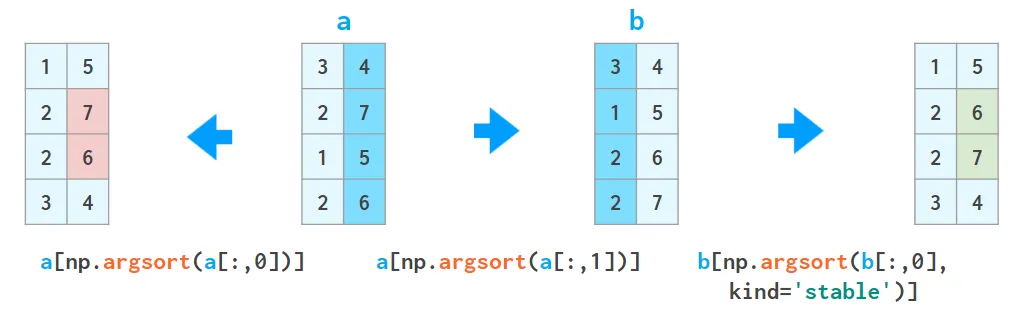

In [91]:
c = np.array([[3, 4], [2, 7], [1, 5], [2, 6]])
print(c)
print(c[np.argsort(c[:, 0])]) # C의 첫번째 열로 정렬하니, 두 번째 열에서 정렬이 안되는 문제가 있다.

print(c[np.argsort(c[:, 0], kind='stable')]) # 위의 그림과 다르게 2번째 열이 정렬이 안된다??

[[3 4]
 [2 7]
 [1 5]
 [2 6]]
[[1 5]
 [2 7]
 [2 6]
 [3 4]]
[[1 5]
 [2 7]
 [2 6]
 [3 4]]


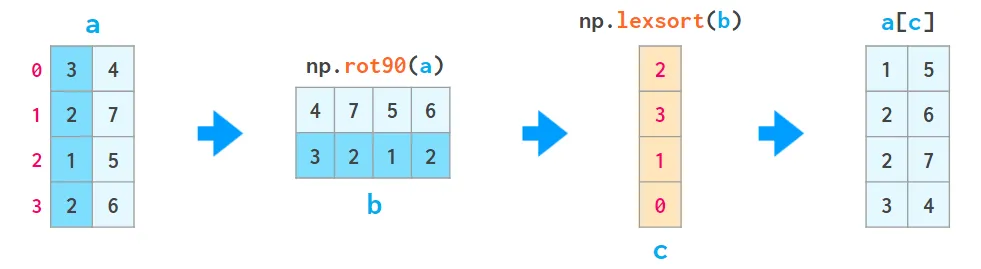

In [95]:
a = [1,5,6,3,4,4] # First column
b = [9,4,5,0,2,1] # Second column
c = np.column_stack([a, b])
print(c)
ind = np.lexsort((b,a)) # Sort by a, then by b --> left-to-right order.
print(ind)
print(c[ind])

[[1 9]
 [5 4]
 [6 5]
 [3 0]
 [4 2]
 [4 1]]
[0 3 5 4 1 2]
[[1 9]
 [3 0]
 [4 1]
 [4 2]
 [5 4]
 [6 5]]


다른 방법도 있다.

In [102]:
a = [1,5,6,3,4,4] # First column
b = [9,4,5,0,2,1] # Second column
c = np.column_stack([a, b])
print(c)

print(c[np.lexsort(np.rot90(c))]) # same as c[np.lexsort((b, a))], Sort by a, then by b
print(c[np.lexsort(np.rot90(c[:, [0,1]]))]) # 0번째 열로 정렬 이후, 1번째 열로 정렬

# Pandas를 이용할 경우
# pd.DataFrame(a).sort_values(by=[0,1]).to_numpy()
# pd.DataFrame(a).sort_values().to_numpy()

[[1 9]
 [5 4]
 [6 5]
 [3 0]
 [4 2]
 [4 1]]
[[1 9]
 [3 0]
 [4 1]
 [4 2]
 [5 4]
 [6 5]]
[[1 9]
 [3 0]
 [4 1]
 [4 2]
 [5 4]
 [6 5]]


np.fliplr

In [100]:
A = np.diag([1.,2.,3.])
print(A)
print(np.fliplr(A)) # same as A[:,::-1]
print(A[:,::-1])
print(np.flipud(A))

[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
[[0. 0. 1.]
 [0. 2. 0.]
 [3. 0. 0.]]
[[0. 0. 1.]
 [0. 2. 0.]
 [3. 0. 0.]]
[[0. 0. 3.]
 [0. 2. 0.]
 [1. 0. 0.]]


#### 3D and Above
- 3차원 배열을 만들고자 할 때 리스트의 의미는 (z, y, x) 이다
- z는 2차원 배열(Plane)의 갯수이다.
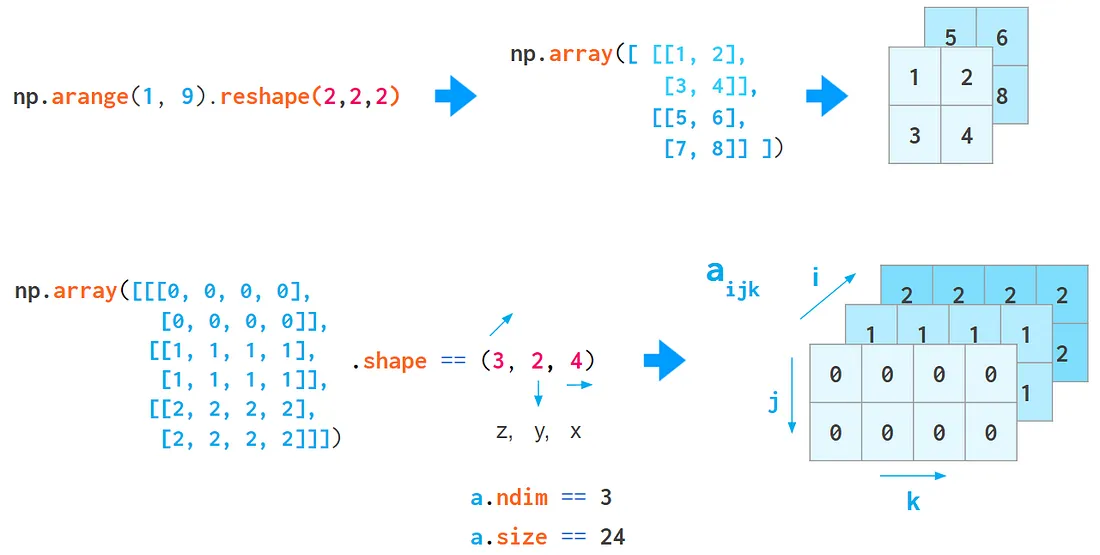
  
- 하지만, RGB 색상을 배열로 표현할 때는 (y, x, z)로 나타내는게 일반적이다. 즉 배열 마지막 원소가 차원을 나타낸다.
- RGB 색상을 배열로 표현할 때 z는 당연히 '3' 값을 가진다.

참고로 MatplotLib은 RGB 순서, OpenCV는 BGR 순서

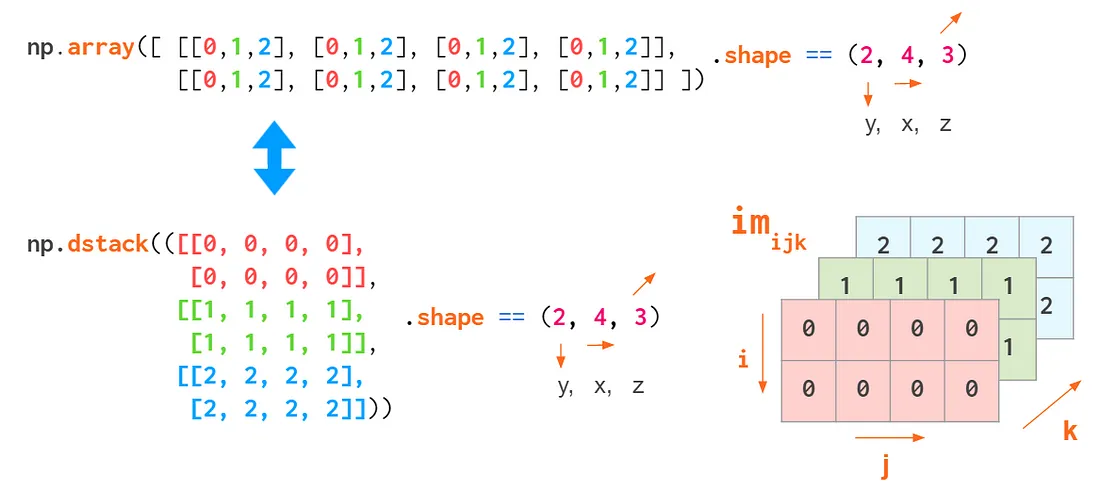

정리하면,  

(z, y, x) 방식으로 이미지 저장하면 a[i]는 (이미지가 여러장 저장되어 있을 때) i번째 Gray-Scale 이미지(!!) 를 가리킬 수 있어서 편하다.  
  
하지만, RGB 색상을 가지는 이미지 1장을 저장한다면,  

(y, x, z) 방식으로 저장할 경우 a[i][j]는 주어진 이미지에서 픽셀 값을 가리킬 수 있다.

따라서, (y, x, z) 방식으로 저장하는 것이 일반적이다.

In [110]:
a = np.array(([[0,0,0,0],
                [0,0,0,0]],
              [[1,1,1,1],
               [1,1,1,1]],
              [[2,2,2,2],
               [2,2,2,2]]))
print(a, a.shape) #(3, 2, 4) <-- (z, y, x)

print() 
# 아래를 보면, 이미지 별로 저장되는 것은 np.array 인것 처럼 보이지만
# 실제로는 np.dstack으로 저장하는 것이 맞다???

b = np.dstack(([[0,0,0,0],
                [0,0,0,0]],
              [[1,1,1,1],
               [1,1,1,1]],
              [[2,2,2,2],
               [2,2,2,2]]))
print(b, b.shape) #(2, 4, 3) <-- (y, x, z)

c = np.array([
  [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]],
  [[0, 1, 2], [0, 1, 2], [0, 1, 2], [0, 1, 2]]
])
print(c)   # b와 c는 저장되는 것이 동일하다!

[[[0 0 0 0]
  [0 0 0 0]]

 [[1 1 1 1]
  [1 1 1 1]]

 [[2 2 2 2]
  [2 2 2 2]]] (3, 2, 4)

[[[0 1 2]
  [0 1 2]
  [0 1 2]
  [0 1 2]]

 [[0 1 2]
  [0 1 2]
  [0 1 2]
  [0 1 2]]] (2, 4, 3)
[[[0 1 2]
  [0 1 2]
  [0 1 2]
  [0 1 2]]

 [[0 1 2]
  [0 1 2]
  [0 1 2]
  [0 1 2]]]


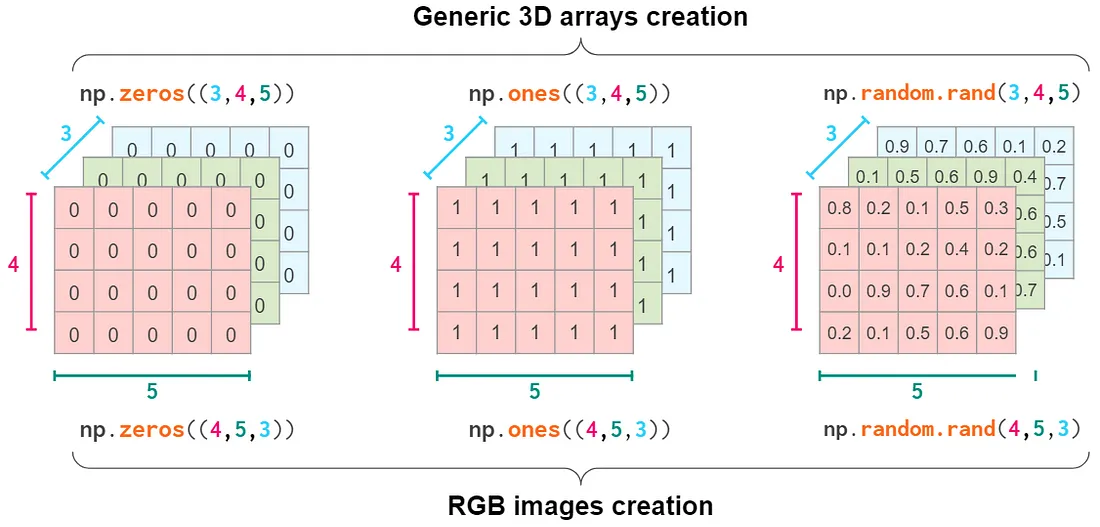

일반적인 3차원 배열을 생성하고자 한자면 (z, y, x)로 생성한다.  
RGB 이미지 공간을 생성하고자 한다면, (y, x, 3) 으로 생성한다

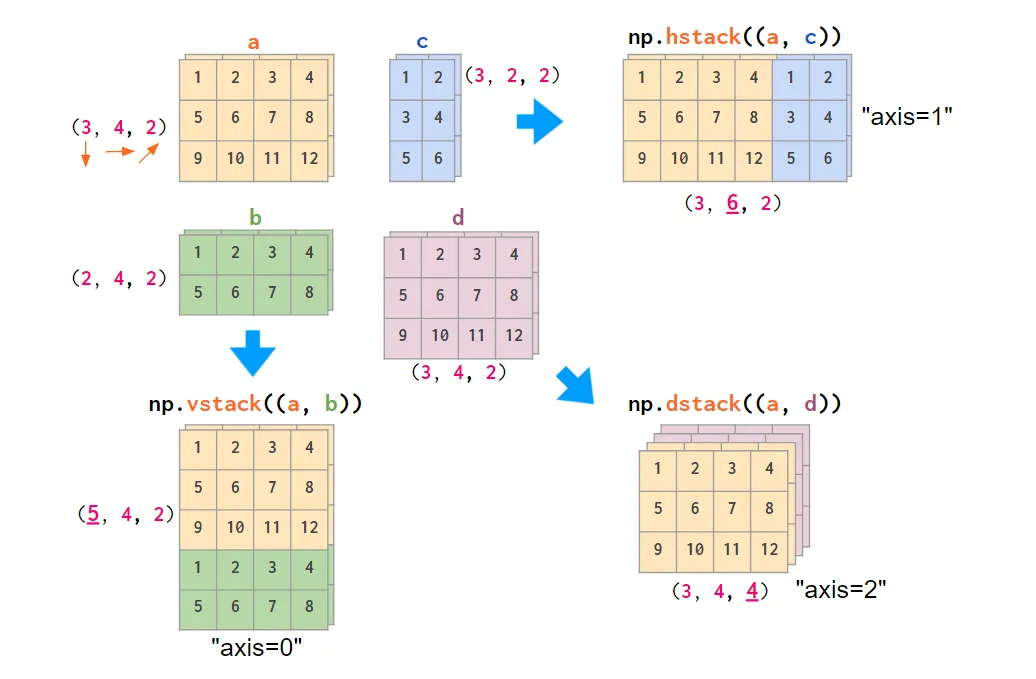
  
- 만약 이미지가 (dstack을 이용해서?) (y, x, z)로 저장되어 있다면 변환은 hstack, vstack, dstack을 이용한다.

In [128]:
a = np.dstack([[[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]],
              [[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]]])
d = a.copy()
c = np.dstack([[[1,2],
              [3,4],
              [5,6]],
              [[1,2],
              [3,4],
              [5,6]]])
              
b = np.dstack([[[1, 2, 3, 4],
              [5, 6, 7, 8]],
              [[1, 2, 3, 4],
              [5, 6, 7, 8]]])
print(a.shape, c.shape, b.shape, d.shape)

res = np.hstack((a, c))
print(res.shape)

res = np.vstack((a, b))
print(res.shape)

res = np.dstack((a, d))
print(res.shape)

(3, 4, 2) (3, 2, 2) (2, 4, 2) (3, 4, 2)
(3, 6, 2)
(5, 4, 2)
(3, 4, 4)


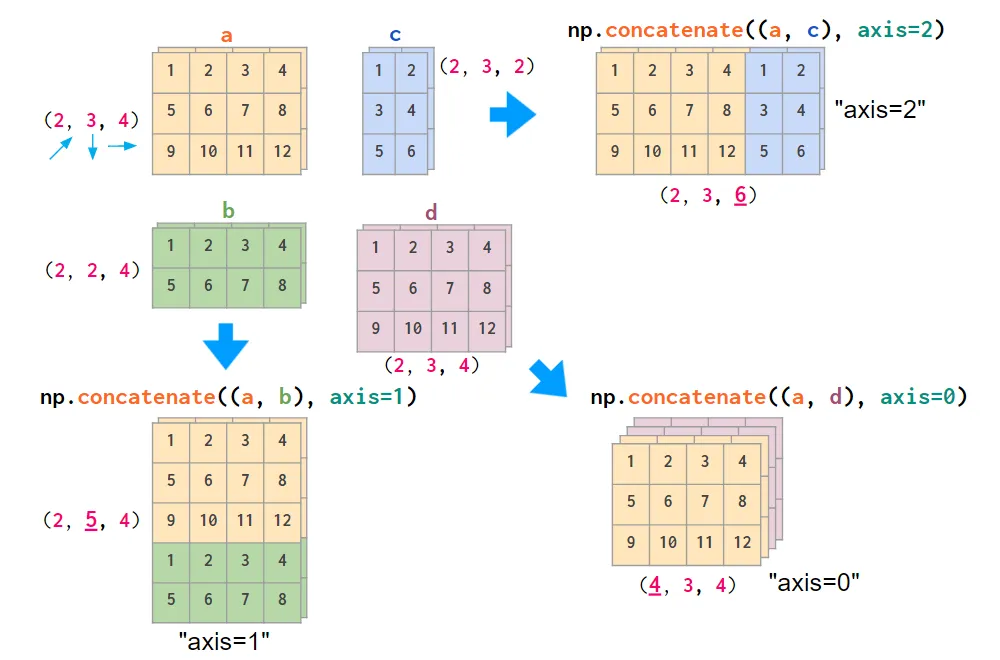
- 만약 (array를 이용해서) (z, y, x)로 저장되어 있다면, 변환은 concatenate를 이용한다.

In [131]:
a = np.array([[[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]],
              [[1, 2, 3, 4],
              [5, 6, 7, 8],
              [9, 10, 11, 12]]])
d = a.copy()
c = np.array([[[1,2],
              [3,4],
              [5,6]],
              [[1,2],
              [3,4],
              [5,6]]])
              
b = np.array([[[1, 2, 3, 4],
              [5, 6, 7, 8]],
              [[1, 2, 3, 4],
              [5, 6, 7, 8]]])
print(a.shape, c.shape, b.shape, d.shape)

res = np.concatenate((a, c), axis=2)
print(res.shape)

res = np.concatenate((a, b), axis=1)
print(res.shape)

res = np.concatenate((a, d), axis=0)
print(res.shape)

(2, 3, 4) (2, 3, 2) (2, 2, 4) (2, 3, 4)
(2, 3, 6)
(2, 5, 4)
(4, 3, 4)


#### Axis Convention

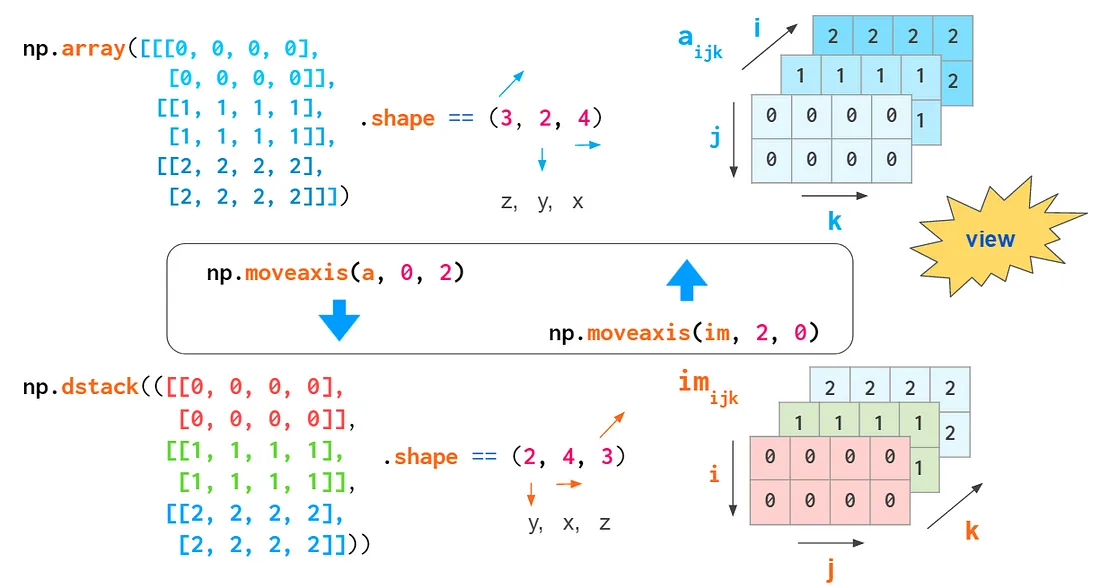

In [135]:
a = np.array(([[0,0,0,0],
                [0,0,0,0]],
              [[1,1,1,1],
               [1,1,1,1]],
              [[2,2,2,2],
               [2,2,2,2]]))
print(a, a.shape)

a = np.moveaxis(a, 0, 2) # 2번째 차원이 0번째로 오라

print(a, a.shape)

b = np.swapaxes(a, )


[[[0 0 0 0]
  [0 0 0 0]]

 [[1 1 1 1]
  [1 1 1 1]]

 [[2 2 2 2]
  [2 2 2 2]]] (3, 2, 4)
[[[0 1 2]
  [0 1 2]
  [0 1 2]
  [0 1 2]]

 [[0 1 2]
  [0 1 2]
  [0 1 2]
  [0 1 2]]] (2, 4, 3)


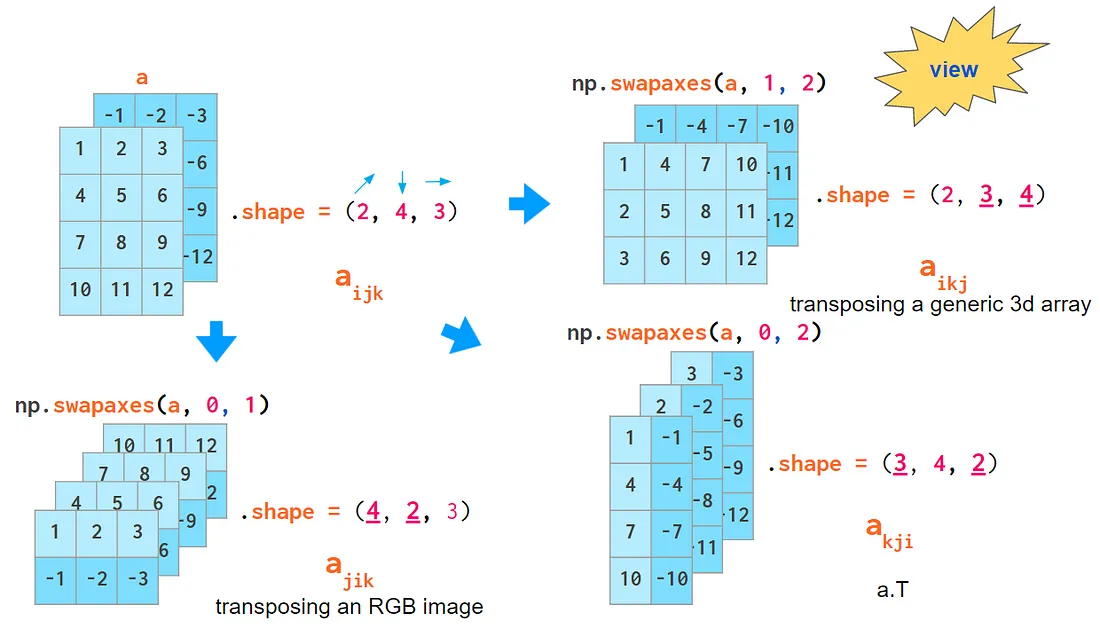

#### np.Einsum

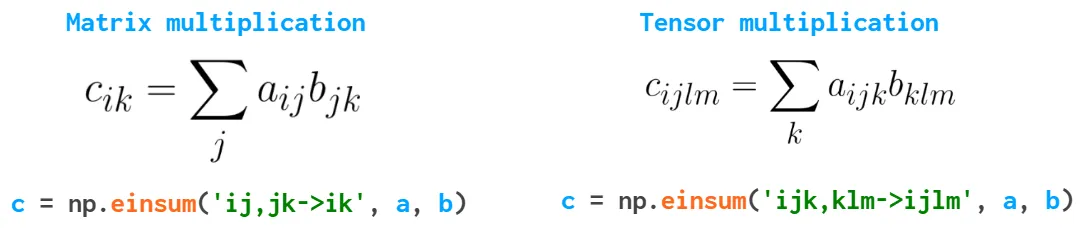

np.einsum 모듈은 for문 사용을 크게 줄여준다.